In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing the dataset

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df1 = df.copy()

In [5]:
df1.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


Checking the count of each classifier

#### 1=> Stroke occured
#### 2=> Stroke didn't occur

<AxesSubplot:>

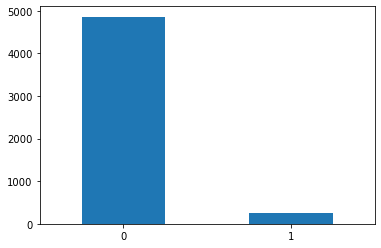

In [6]:
df['stroke'].value_counts().plot.bar(x = 'Stroke Occured', y = 'Frequency',rot=0)

In [10]:
df.groupby('stroke').describe()

id                                                                \
         count          mean           std    min      25%      50%      75%   
stroke                                                                         
0       4861.0  36487.236371  21120.133386   67.0  17762.0  36958.0  54497.0   
1        249.0  37115.068273  21993.344872  210.0  17013.0  36706.0  56669.0   

                    age             ... avg_glucose_level             bmi  \
            max   count       mean  ...               75%     max   count   
stroke                              ...                                     
0       72940.0  4861.0  41.971545  ...            112.83  267.76  4700.0   
1       72918.0   249.0  67.728193  ...            196.71  271.74   209.0   

                                                           
             mean       std   min   25%   50%   75%   max  
stroke                                                     
0       28.823064  7.908287  10.3  23.4  28.0  33.1  97.6  
1       30.471292  6.329452  16.9  26.4  29.7  33.7  56.6  

[2 rows x 48 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df_stroke1 = df[df['stroke'] == 1]

In [9]:
df_new = pd.DataFrame(df1)
for i in range(0,19):
    df_new = pd.concat([df_new,df_stroke1],ignore_index = True)

Balancing the number of positive and negative sentiments

In [18]:
df_new.groupby('stroke').describe()

id                                                                \
         count          mean           std    min      25%      50%      75%   
stroke                                                                         
0       4861.0  36487.236371  21120.133386   67.0  17762.0  36958.0  54497.0   
1       4980.0  37115.068273  21951.341160  210.0  17013.0  36706.0  56669.0   

                    age             ... avg_glucose_level             bmi  \
            max   count       mean  ...               75%     max   count   
stroke                              ...                                     
0       72940.0  4861.0  41.971545  ...            112.83  267.76  4700.0   
1       72918.0  4980.0  67.728193  ...            196.71  271.74  4180.0   

                                                           
             mean       std   min   25%   50%   75%   max  
stroke                                                     
0       28.823064  7.908287  10.3  23.4  28.0  33.1  97.6  
1       30.471292  6.315047  16.9  26.4  29.7  33.7  56.6  

[2 rows x 48 columns]

<AxesSubplot:>

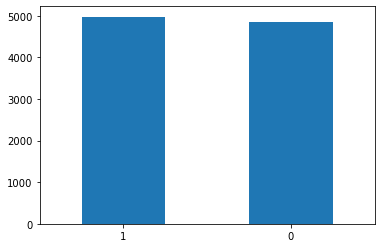

In [10]:
df_new['stroke'].value_counts().plot.bar(x = 'Stroke Occured', y = 'Frequency',rot=0)

#### Checking the correlation of heart_disease with chance of stroke

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

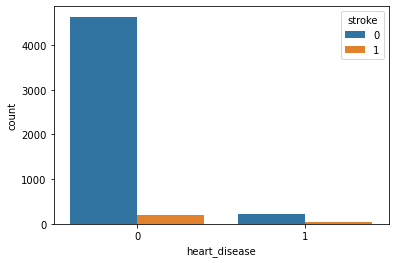

In [33]:
sns.countplot(x = 'heart_disease',hue = 'stroke', data = df1 )

#### Checking the correlation of hypertension with stroke

<AxesSubplot:xlabel='hypertension', ylabel='count'>

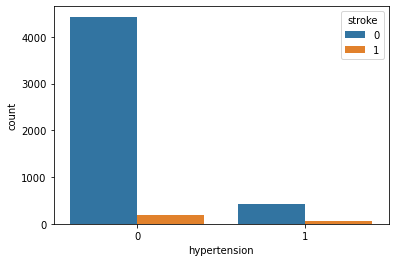

In [32]:
sns.countplot(x = 'hypertension',hue = 'stroke', data = df1 )

In [34]:
X = df_new.drop(['stroke'],axis = 1)
y = df_new['stroke']

In [35]:
s = (X.dtypes == 'object')
cat_cols = list(s[s].index)

In [36]:
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [37]:
X_non_cat = X.drop(cat_cols,axis = 1)
X_non_cat.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046,67.0,0,1,228.69,36.6
1,51676,61.0,0,0,202.21,NaN
2,31112,80.0,0,1,105.92,32.5
3,60182,49.0,0,0,171.23,34.4
4,1665,79.0,1,0,174.12,24.0


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

In [39]:
imputed_X = pd.DataFrame(imputer.fit_transform(X_non_cat))

In [40]:
imputed_X.columns = X_non_cat.columns

In [41]:
imputed_X.isnull().sum() #null values removed

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
dtype: int64

In [42]:
X_cat = X[cat_cols]

In [43]:
X_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [45]:
for col in cat_cols:
    X_cat[col] = label_encoder.fit_transform(X_cat[col])

<ipython-input-45-8b95c5eb9a1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat[col] = label_encoder.fit_transform(X_cat[col])


In [46]:
X_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2


In [47]:
df_final = pd.concat([imputed_X,X_cat],axis = 1)

In [48]:
df_final.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,9046.0,67.0,0.0,1.0,228.69,36.600000,1,1,2,1,1
1,51676.0,61.0,0.0,0.0,202.21,29.598919,0,1,3,0,2
2,31112.0,80.0,0.0,1.0,105.92,32.500000,1,1,2,0,2
3,60182.0,49.0,0.0,0.0,171.23,34.400000,0,1,2,1,3
4,1665.0,79.0,1.0,0.0,174.12,24.000000,0,1,3,0,2


#### Splitting into training and test data

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.30, random_state=1)

### Implementing 3 classification models:-
#### 1. XGBoost
#### 2. Random Forest
#### 3. SVC

##### XGBoost

In [57]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 1000,learning_rate = 0.05)
model.fit(X_train,y_train,early_stopping_rounds = 5,eval_set = [(X_test,y_test)],verbose = False)
y_pred = model.predict(X_test)

C:\Users\pradh\anaconda3\envs\sayantan\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1459
           1       0.97      1.00      0.98      1494

    accuracy                           0.98      2953
   macro avg       0.98      0.98      0.98      2953
weighted avg       0.98      0.98      0.98      2953



##### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators= 1000, random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1459
           1       0.99      1.00      0.99      1494

    accuracy                           0.99      2953
   macro avg       0.99      0.99      0.99      2953
weighted avg       0.99      0.99      0.99      2953



##### SVC

In [53]:
from sklearn.svm import SVC
model= SVC(kernel='linear')
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.82      0.66      0.73      1459
           1       0.72      0.86      0.78      1494

    accuracy                           0.76      2953
   macro avg       0.77      0.76      0.76      2953
weighted avg       0.77      0.76      0.76      2953

